#### Bayesian Logit Normal Inference
We assume that the logit transformation of our response, 
$$z_i = \log\left(\frac{y_i}{1-y_i}\right)$$
is modeled as
$$z_i \sim \mathcal{N}(X_i\beta,\,\sigma^2)$$
This means that the likelihood is
$$L(\beta,\sigma^2\mid z) \propto (2\pi\sigma^2)^{-n/2}\exp\!\Bigl\{-\frac{1}{2\sigma^2}(z-X\beta)^\top(z-X\beta)\Bigr\}$$
Using Jeffrey's prior, we have:
$$\pi(\beta,\sigma^2) \propto \frac{1}{\sigma^{p+2}}$$
Which leads (after some algebra) to closed form conditionals:
- Conditional for $\beta$ given $\sigma^2$:
$$\beta\mid\sigma^2,z \sim \mathcal{N}\Bigl(\hat{\beta},\,\sigma^2 (X^\top X)^{-1}\Bigr)$$
with $\hat{\beta} = (X^\top X)^{-1}X^\top z$.

- Conditional for $\sigma^2$ given $\beta$:
$$\sigma^2\mid\beta,z \sim \text{Inverse-Gamma}\Bigl(\frac{n}{2},\,\frac{\text{SSE}}{2}\Bigr)$$
where $\text{SSE} = (z-X\beta)^\top(z-X\beta)$


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.special import logit
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import invgamma, multivariate_normal



ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv('justice_score.csv', encoding='ISO-8859-1')
df = df.loc(
    (df['gend'] != 98) & (df['gend'] ! = 99)
)
df

,score_JG,country_name_ltn,nuts_id,gend,edu,emp,age,urban,ethni_groups
0,0.351852,Austria,AT1,2,3.0,1,50,1,0.0
1,0.055556,Austria,AT1,2,6.0,1,49,1,0.0
2,0.500000,Austria,AT1,1,3.0,6,70,2,1.0
3,0.944444,Austria,AT1,2,5.0,7,39,1,1.0
4,0.500000,Austria,AT1,1,7.0,7,53,1,0.0
...,...,...,...,...,...,...,...,...,...
27703,0.055556,Sweden,SE3,2,7.0,1,31,1,0.0
27704,0.944444,Sweden,SE3,2,5.0,1,28,1,0.0
27705,0.055556,Sweden,SE3,1,4.0,3,26,1,0.0
27706,0.500000,Sweden,SE3,1,4.0,1,55,2,0.0


It is clear that we are nowhere close to a normally distributed y value. let's try transform the data.


<Axes: ylabel='Density'>

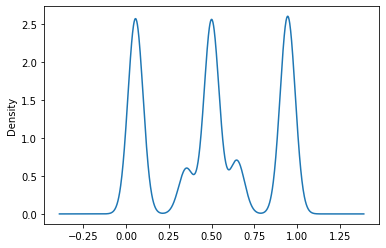

In [3]:
df['score_JG'].plot(kind= 'kde')

<Axes: ylabel='Density'>

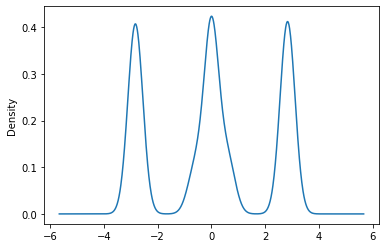

In [4]:
log_score = logit(df['score_JG'])
log_score.plot(kind='kde')

before we aggregate, let;s do some data formatting so our variables can be ore descriptive

In [5]:
df['gend'] = df['gend'].apply(lambda x: 0 if x == 2 else 1)
df['urban'] = df['urban'].apply(lambda x: 0 if x == 2 else 1)
df

,score_JG,country_name_ltn,nuts_id,gend,edu,emp,age,urban,ethni_groups
0,0.351852,Austria,AT1,0,3.0,1,50,1,0.0
1,0.055556,Austria,AT1,0,6.0,1,49,1,0.0
2,0.500000,Austria,AT1,1,3.0,6,70,0,1.0
3,0.944444,Austria,AT1,0,5.0,7,39,1,1.0
4,0.500000,Austria,AT1,1,7.0,7,53,1,0.0
...,...,...,...,...,...,...,...,...,...
27703,0.055556,Sweden,SE3,0,7.0,1,31,1,0.0
27704,0.944444,Sweden,SE3,0,5.0,1,28,1,0.0
27705,0.055556,Sweden,SE3,1,4.0,3,26,1,0.0
27706,0.500000,Sweden,SE3,1,4.0,1,55,0,0.0


now that we have changed the values to one and zeros, we can group the data

In [6]:
df_grouped = df.groupby(['country_name_ltn','nuts_id']).mean().reset_index()
df_grouped


,country_name_ltn,nuts_id,score_JG,gend,edu,emp,age,urban,ethni_groups
0,Austria,AT1,0.508514,0.487356,5.448276,4.006897,45.924138,0.719540,0.609195
1,Austria,AT2,0.501474,0.437811,5.935323,3.888060,46.967662,0.599502,0.567164
2,Austria,AT3,0.513670,0.436409,5.653367,4.399002,45.386534,0.633416,0.518703
3,Belgium,BE1,0.541123,0.491103,5.654804,3.932384,42.366548,1.000000,0.473310
4,Belgium,BE2,0.520055,0.467249,4.393013,5.034934,47.755459,0.930131,0.650655
...,...,...,...,...,...,...,...,...,...
102,Spain,ES6,0.499009,0.488294,5.254181,3.735786,48.331104,0.896321,0.000000
103,Spain,ES7,0.538647,0.431884,5.301449,4.002899,43.707246,0.933333,0.000000
104,Sweden,SE1,0.510667,0.484000,7.144000,3.368000,42.788000,0.876000,0.000000
105,Sweden,SE2,0.491972,0.458128,4.975369,4.275862,47.182266,0.679803,0.000000


let's look at the distribution now

<Axes: ylabel='Density'>

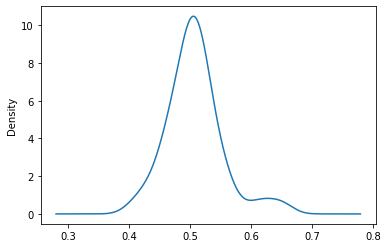

In [7]:
df_grouped.score_JG.plot(kind = 'kde')

Now that we have noticed the disrtibution is slightly closer to normal, let's apply a log transformationa and see if it is sufficient 

<Axes: ylabel='Density'>

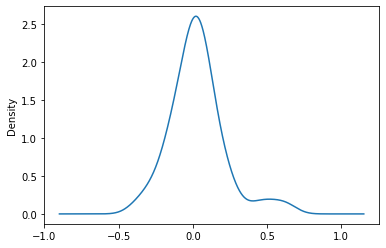

In [8]:
X= logit(df_grouped.score_JG)
X.plot(kind='kde')

Let's have a look at our Yi's and see if there is anything to worry about

In [9]:
Y = df_grouped[["gend","edu","emp","age","urban","ethni_groups"]]
Y

,gend,edu,emp,age,urban,ethni_groups
0,0.487356,5.448276,4.006897,45.924138,0.719540,0.609195
1,0.437811,5.935323,3.888060,46.967662,0.599502,0.567164
2,0.436409,5.653367,4.399002,45.386534,0.633416,0.518703
3,0.491103,5.654804,3.932384,42.366548,1.000000,0.473310
4,0.467249,4.393013,5.034934,47.755459,0.930131,0.650655
...,...,...,...,...,...,...
102,0.488294,5.254181,3.735786,48.331104,0.896321,0.000000
103,0.431884,5.301449,4.002899,43.707246,0.933333,0.000000
104,0.484000,7.144000,3.368000,42.788000,0.876000,0.000000
105,0.458128,4.975369,4.275862,47.182266,0.679803,0.000000


<Axes: >

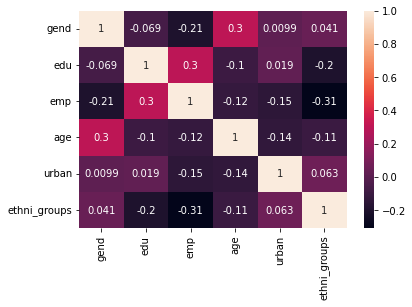

In [10]:
sns.heatmap(Y.corr(),annot=True)

It looks good, we are not too concerned about autocorlation at this point. we will have a look at our results and check again 

In [11]:
Y_train,Y_test,X_train, X_test,  = train_test_split(X,Y,test_size=0.5)

Let's define our prior parameters

In [12]:
p = X_train.shape[1]
n = X_train.shape[0]
beta_0 = np.zeros(p)  
V_0 = np.eye(p) * 10  
a_0, b_0 = 2, 2  

let's do our posterior now

In [13]:
V_n = np.linalg.inv(X_train.T @ X_train + np.linalg.inv(V_0))
beta_n = V_n @ (X_train.T @ Y_train + np.linalg.inv(V_0) @ beta_0)
a_n = a_0 + n / 2
b_n = b_0 + 0.5 * ((Y_train - X_train @ beta_n).T @ (Y_train - X_train @ beta_n))

#### Bayesian Logit Normal Inference
We assume that the logit transformation of our response, 
$$z_i = \log\left(\frac{y_i}{1-y_i}\right)$$
is modeled as
$$z_i \sim \mathcal{N}(X_i\beta,\,\sigma^2)$$
This means that the likelihood is
$$L(\beta,\sigma^2\mid z) \propto (2\pi\sigma^2)^{-n/2}\exp\!\Bigl\{-\frac{1}{2\sigma^2}(z-X\beta)^\top(z-X\beta)\Bigr\}$$
Using Jeffrey's prior, we have:
$$\pi(\beta,\sigma^2) \propto \frac{1}{\sigma^{p+2}}$$
Which leads (after some algebra) to closed form conditionals:
- Conditional for $\beta$ given $\sigma^2$:
$$\beta\mid\sigma^2,z \sim \mathcal{N}\Bigl(\hat{\beta},\,\sigma^2 (X^\top X)^{-1}\Bigr)$$
with $\hat{\beta} = (X^\top X)^{-1}X^\top z$.

- Conditional for $\sigma^2$ given $\beta$:
$$\sigma^2\mid\beta,z \sim \text{Inverse-Gamma}\Bigl(\frac{n}{2},\,\frac{\text{SSE}}{2}\Bigr)$$
where $\text{SSE} = (z-X\beta)^\top(z-X\beta)$


Sampling from our posterior and examine our predictive distribution

In [14]:
sigma2_sample = invgamma.rvs(a_n, scale=b_n, size=1)
beta_sample = multivariate_normal.rvs(beta_n, V_n)
X_new = np.random.randn(1, p)
mu_pred = X_new @ beta_sample
y_pred = 1 / (1 + np.exp(-np.random.normal(mu_pred, np.sqrt(sigma2_sample))))